In [8]:
import json
from Bio import SeqIO, Phylo, Seq
import pandas as pd
from string import digits
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [9]:
ref = SeqIO.read("data/areference.gbk", "genbank")
def CDS_finder(reference):
    """this function finds CDS location and not CDS location, and saves only those not located at the end of the function"""
    cds_ = dict()
    for feature in reference.features:
        if feature.type == 'CDS': 
            cds_[feature.qualifiers['gene'][0]] = (list(feature.location))

        #if feature.type == 'source':everything = list(feature.location)

    #not_cds = list(set(everything)-set(cds_))
    #corrected_CDS = [x for x in cds_ if x<=14900]
    #corrected_not_CDS = [x for x in not_cds if x<=14900]
    return(cds_)

gene_cds = CDS_finder(ref)

def mutation_recursive(node, dictionary_=None, new_=None):
    """ this function returns a dictionary with node name as key and a list of mutations along that branch as the info, and excludes deletions and unknowns"""
    gene_cds = CDS_finder(ref)

    if new_ is None:
        new_ = []
    if dictionary_ is None:
        dictionary_ = dict()

    if 'mutations' in node['branch_attrs']:
        aa_mutations = []
        new_ = []
        in_it = []
        if 'nuc' in node['branch_attrs']['mutations']:
            for gene, loc in gene_cds.items():
                if gene in node['branch_attrs']['mutations']:
                    for mut in node['branch_attrs']['mutations'][gene]:
                        aa_mutations.append(int(mut[1:-1])*3+loc[0])
            for mut in node['branch_attrs']['mutations']['nuc']:
                if '-' not in mut and '*' not in mut and 'N' not in mut and "R" not in mut and "Y" not in mut and "M" not in mut and "D" not in mut:
                    if int(mut[1:-1]) not in aa_mutations and int(mut[1:-1])+2 not in aa_mutations and int(mut[1:-1])+1 not in aa_mutations:
                        new_.append(mut)
                    else: in_it.append(mut[1:-1])
             
    if 'name' in node:
            dictionary_[node['name']] = new_

    if 'children' in node:
        for child in node['children']:
           mutation_recursive(child, dictionary_, new_=None)
    return(dictionary_)


[0.061488673139158574, 0.21035598705501618, 0.23624595469255663, 0.12944983818770225, 0.032362459546925564, 0.061488673139158574, 0.016181229773462782, 0.03559870550161812, 0.012944983818770227, 0.022653721682847898, 0.016181229773462782, 0.06472491909385113, 0.02912621359223301, 0.016181229773462782]
[0.2717149220489978, 0.09799554565701558, 0.05790645879732739, 0.0935412026726058, 0.022271714922048998, 0.0200445434298441, 0.044543429844097995, 0.044543429844097995, 0.031180400890868598, 0.1291759465478842, 0.011135857461024499, 0.042316258351893093, 0.011135857461024499, 0.0334075723830735, 0.024498886414253896, 0.0200445434298441]


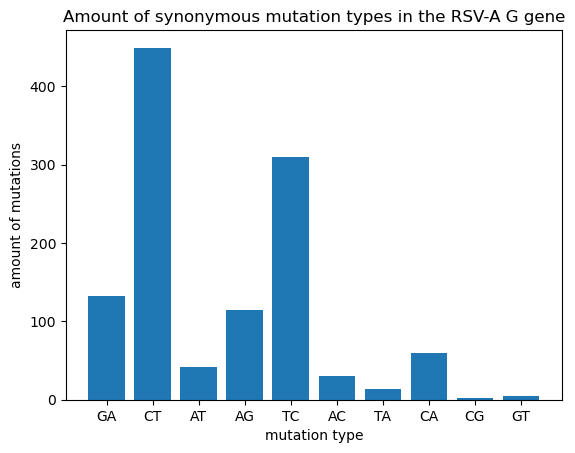

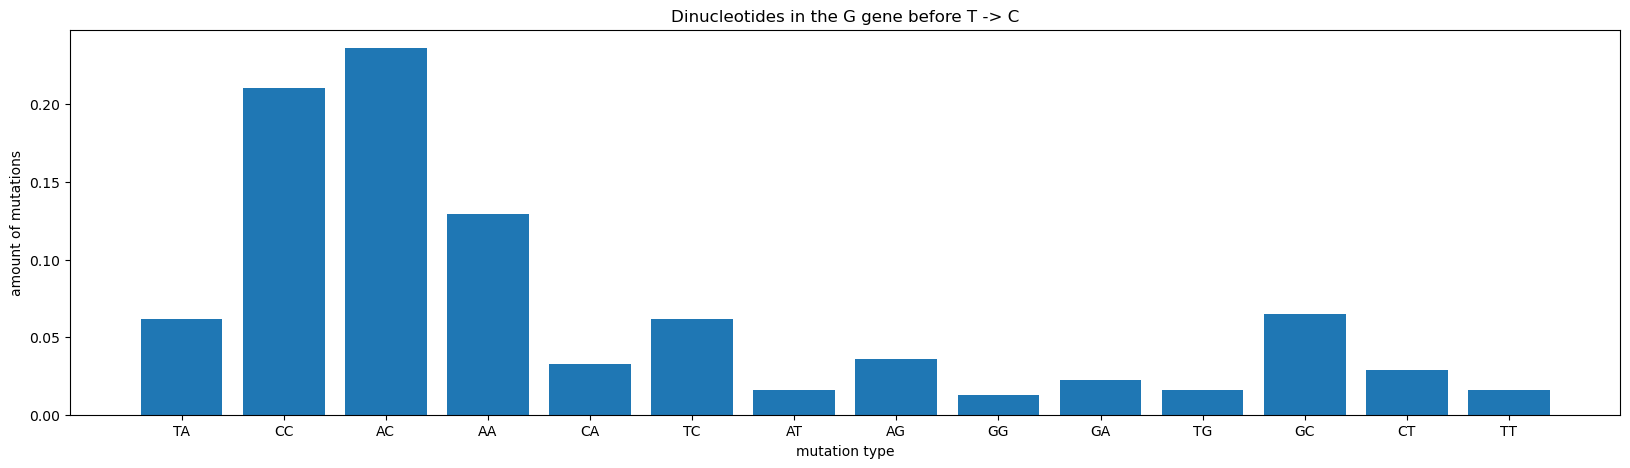

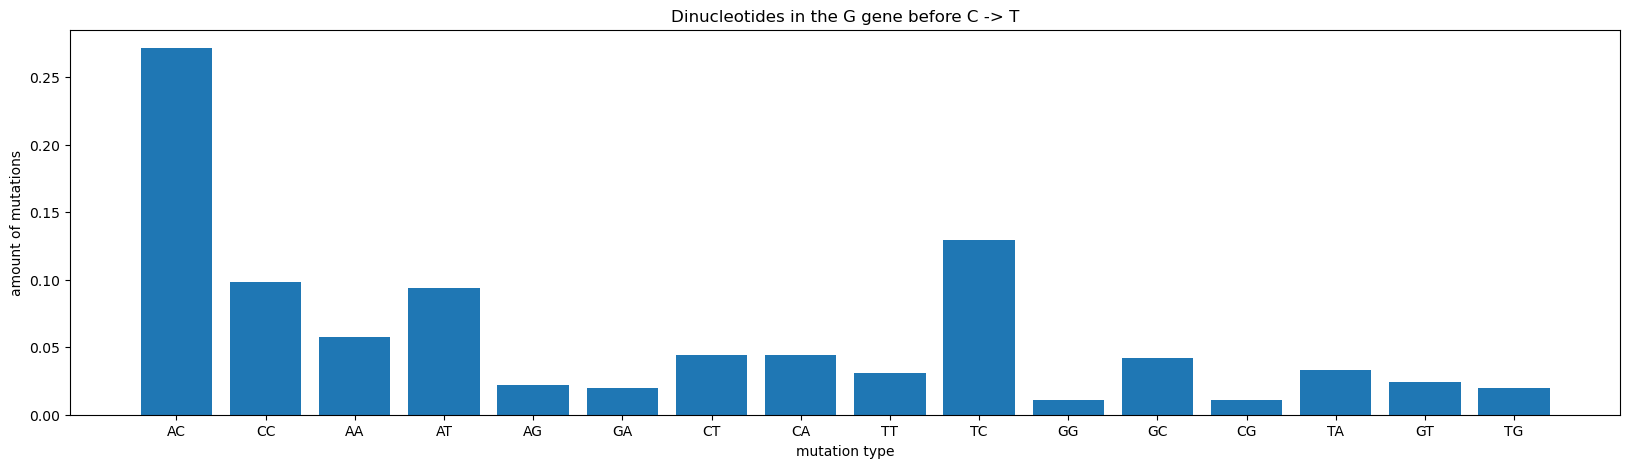

In [16]:
G_muts = []
G_only_muts = defaultdict(list)
with open ("data/rsv_a_genome.json") as file_:
    f = json.load(file_)  
    mut_by_node = mutation_recursive(f['tree'])
    for node, muts in mut_by_node.items():
        for m in muts:
            if int(m[1:-1]) in range(int(gene_cds["G"][0]), int(gene_cds["G"][-1])+1):
                G_muts.append(f'{m[0]}{m[-1]}')
                G_only_muts[node].append(m)
            
for_graph = Counter(G_muts)
plt.bar(for_graph.keys(), for_graph.values())
plt.title("Amount of synonymous mutation types in the RSV-A G gene")
plt.xlabel("mutation type")
plt.ylabel("amount of mutations")

# dinucleotides
all_dinucleotides, all_trinucleotides, all_tetranucleotides = ([] for i in range(3))
aligned_for_tree = SeqIO.parse("data/reconstructed_sequences.fasta", "fasta")
for entry in aligned_for_tree:
    for i in G_only_muts[entry.id]:
        location_of_interest = int(i[1:-1])
        #print(i)
        #print(entry.seq[location_of_interest-3:location_of_interest-1])
        dinucleotide_and_mut = entry.seq[location_of_interest-3:location_of_interest-1] + f'{i[0]}{i[-1]}'
        trinucleotide_and_mut = entry.seq[location_of_interest-4:location_of_interest-1] + f'{i[0]}{i[-1]}'
        tetranucleotide_and_mut = entry.seq[location_of_interest-5:location_of_interest-1] + f'{i[0]}{i[-1]}'

        all_dinucleotides.append(str(dinucleotide_and_mut))
        all_trinucleotides.append(str(trinucleotide_and_mut))
        all_tetranucleotides.append(str(tetranucleotide_and_mut))


gc_list, cg_list, ca_list, ct_list, ga_list, ag_list, tc_list, gt_list, at_list, ac_list, ta_list, tg_list = ([] for i in range(12))
ct_list_tri, tc_list_tri = ([] for i in range(2))
ct_list_tetra, tc_list_tetra = ([] for i in range(2))
for item_ in all_dinucleotides:
    if "-" not in item_:
        #if item_[2:] == "GC": gc_list.append(item_)
        #if item_[2:] == "CG": cg_list.append(item_)
        #if item_[2:] == "GA": ga_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)
        #if item_[2:] == "CA": ca_list.append(item_)
        if item_[2:] == "CT": ct_list.append(item_)
        if item_[2:] == "TC": tc_list.append(item_)
        #if item_[2:] == "GT": gt_list.append(item_)
        #if item_[2:] == "TG": tg_list.append(item_)
        #if item_[2:] == "AT": at_list.append(item_)
        #if item_[2:] == "TA": ta_list.append(item_)
        #if item_[2:] == "AC": ac_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)
for item_ in all_trinucleotides:
    if "-" not in item_:
        if item_[3:] == "CT": ct_list_tri.append(item_)
        if item_[3:] == "TC": tc_list_tri.append(item_)
for item_ in all_tetranucleotides:
    if "-" not in item_:
        if item_[4:] == "CT": ct_list_tetra.append(item_)
        if item_[4:] == "TC": tc_list_tetra.append(item_)

dinucl_counter = Counter(all_dinucleotides)
trinucl_counter = Counter(all_trinucleotides)
tetranucl_counter = Counter(all_tetranucleotides)
#gc_counter = Counter(gc_list)
#cg_counter = Counter(cg_list)
#ca_counter = Counter(ca_list)
ct_counter = Counter(ct_list)
#ga_counter = Counter(ga_list)
#ag_counter = Counter(ag_list)
tc_counter = Counter(tc_list)
tc_count_tr = Counter(tc_list_tri)
ct_count_tr = Counter(ct_list_tri)

ct_count_te = Counter(ct_list_tetra)
tc_count_te = Counter(tc_list_tetra)
#gt_counter = Counter(gt_list)

#at_counter = Counter(at_list)
#ac_counter = Counter(ac_list)
#ta_counter = Counter(ta_list)
#tg_counter = Counter(tg_list)

#counters = [gc_counter, cg_counter, ca_counter, ct_counter,ga_counter, ag_counter, tc_counter, gt_counter, at_counter, ac_counter, ta_counter, tg_counter]
counters = [tc_counter, ct_counter]
#type_= ["GC", "CG", "CA", "CT", "GA", "AG", "TC", "GT", "AT", "AC", "TA", "TG"]
type_ = ["TC", "CT"]
for counter_, typ in zip(counters, type_):
    plt_1 = plt.figure(figsize=(20, 5))
    for mut, freq in for_graph.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            print(values_weighed)
            dinucl = [key[:2] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Dinucleotides in the G gene before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()


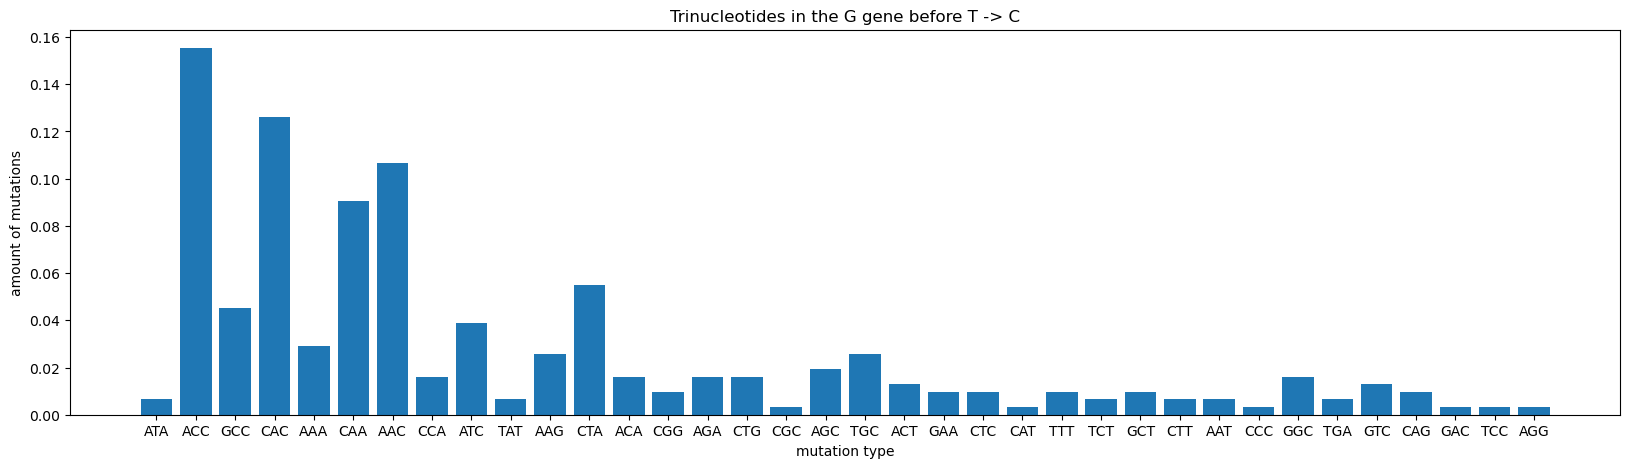

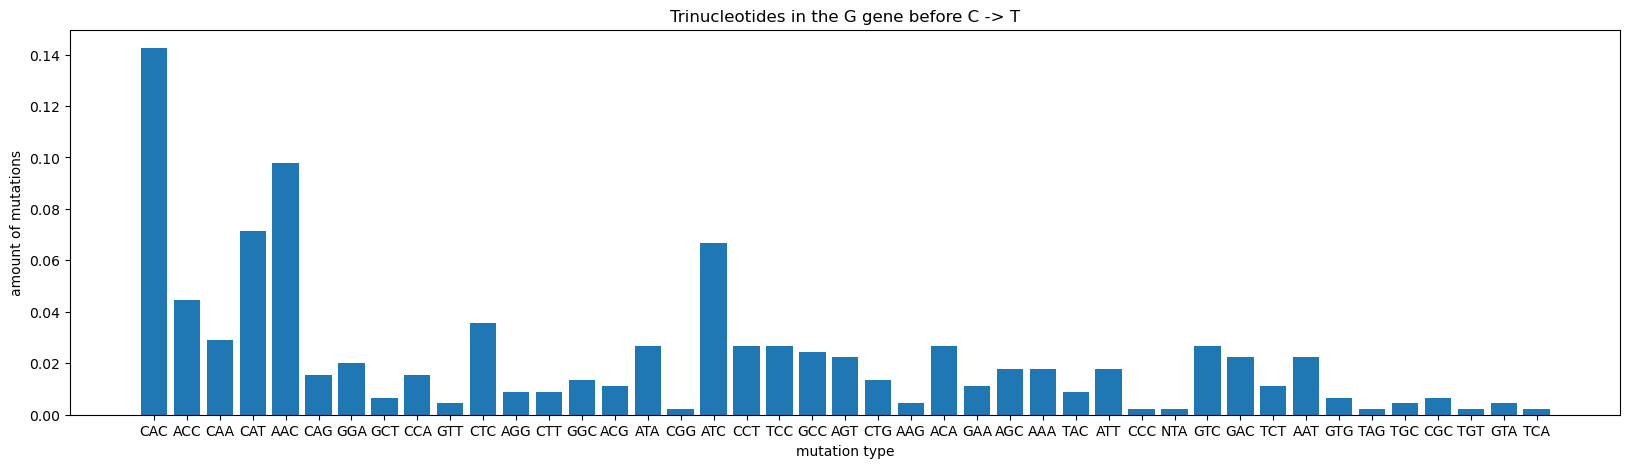

In [17]:
counters = [tc_count_tr, ct_count_tr]
type_ = ["TC", "CT"]
for (i,counter_), typ in zip(enumerate(counters), type_):
    plt_1 = plt.figure(figsize=(20, 5))
    for mut, freq in for_graph.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            dinucl = [key[:3] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Trinucleotides in the G gene before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()

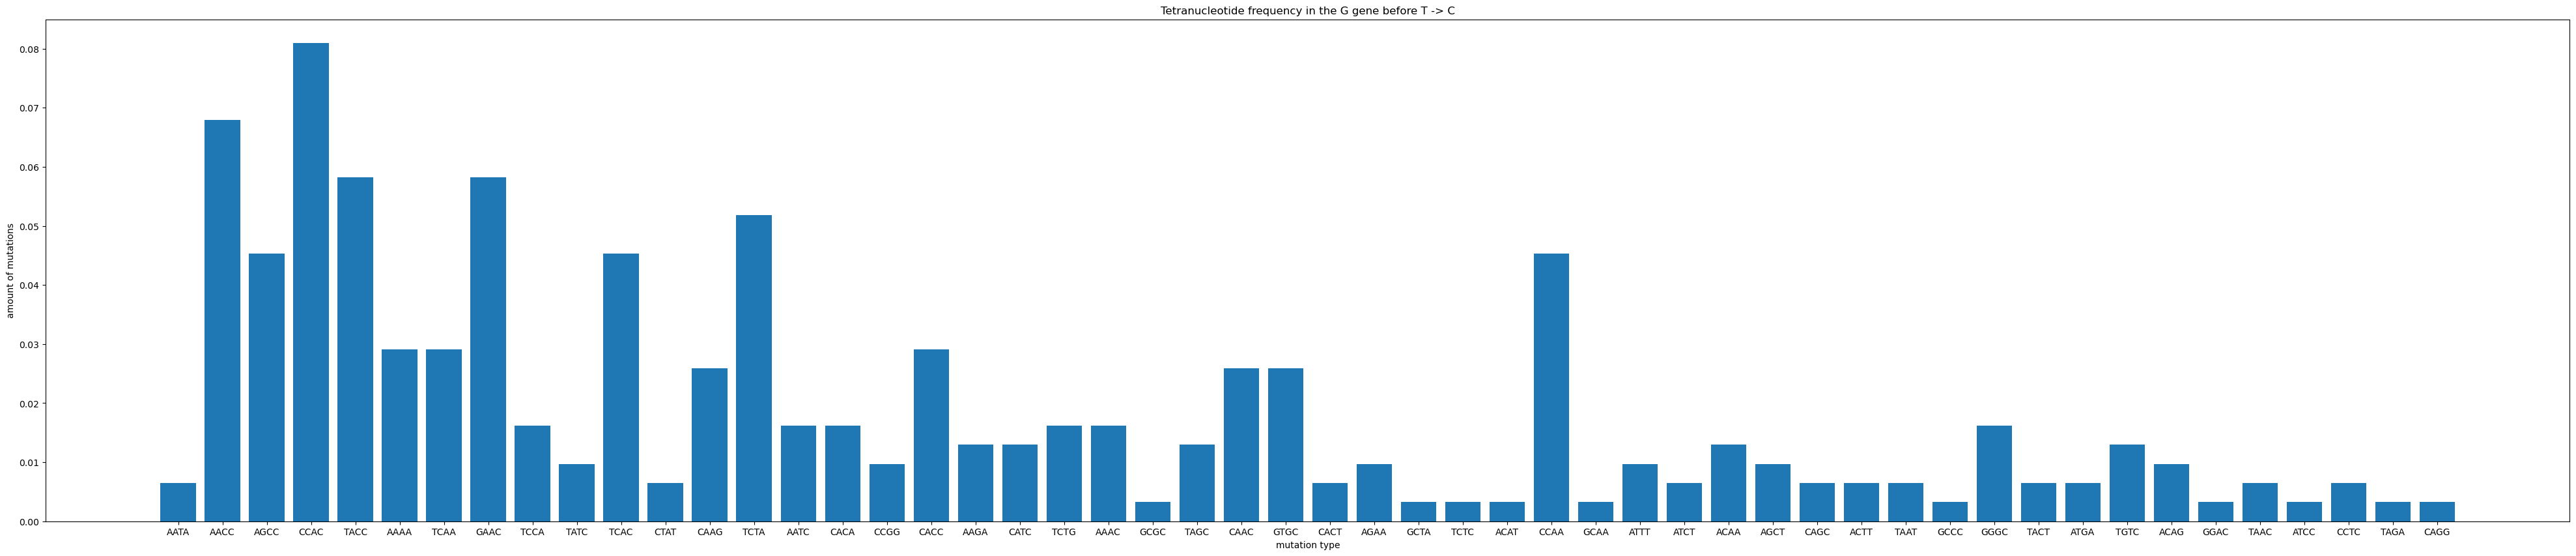

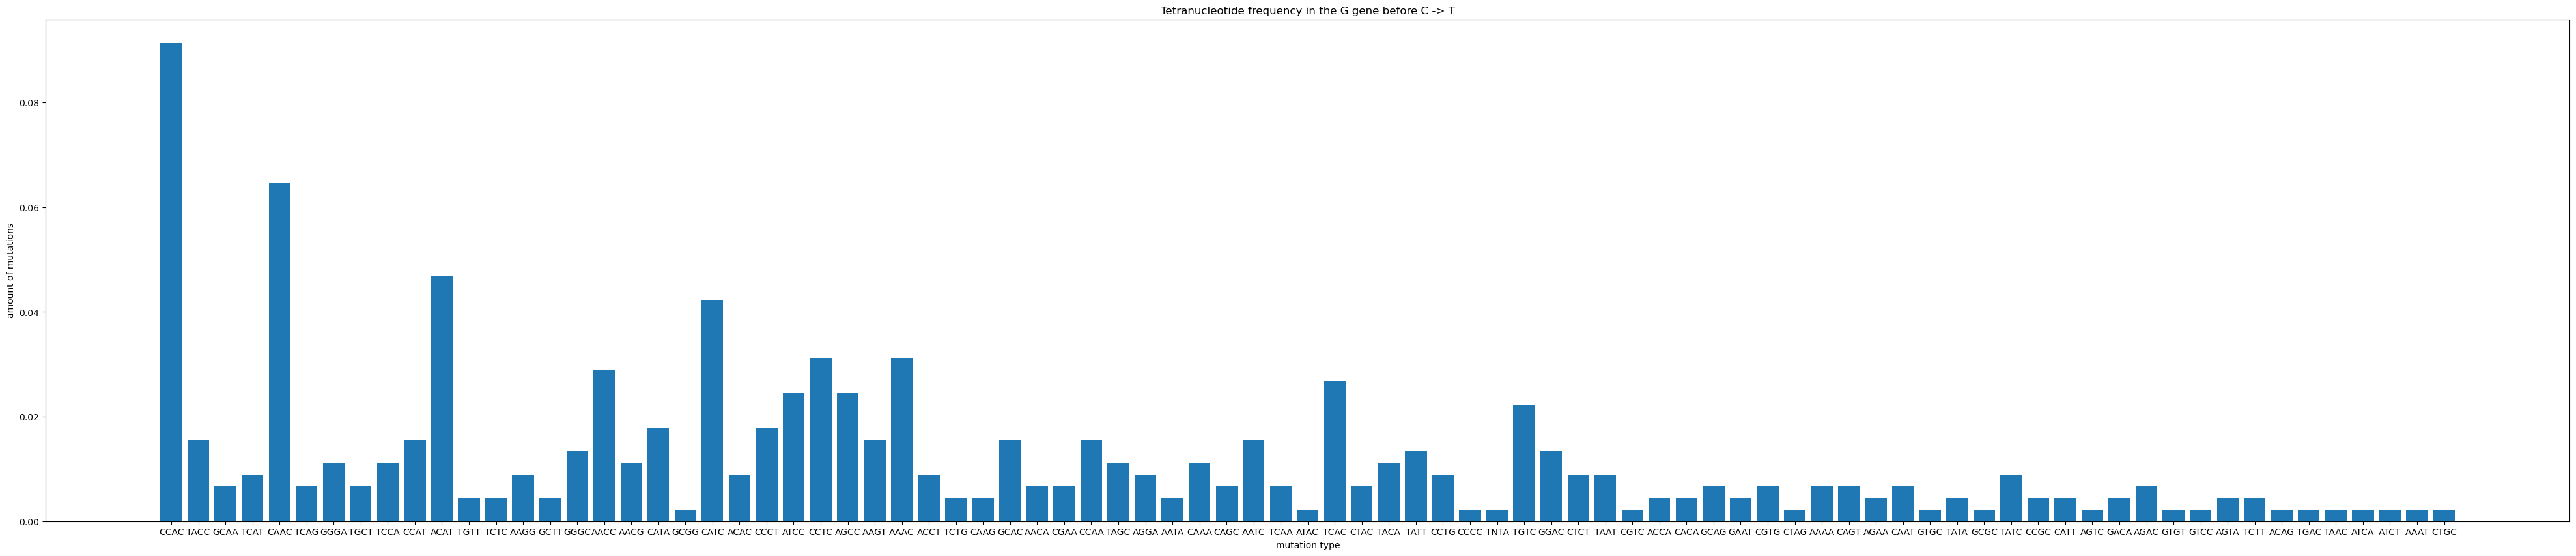

In [18]:
counters = [tc_count_te, ct_count_te]
type_ = ["TC", "CT"]
for counter_, typ in zip(counters, type_):
    plt_1 = plt.figure(figsize=(50, 10))
    for mut, freq in for_graph.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            dinucl = [key[:4] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Tetranucleotide frequency in the G gene before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()